
The original EDA used HDF5 via S3 and Sagemaker. Then we converted to parquet files, but images still remained in HDF5. The pipeline now uses a web dataset with resizing handled during web dataset creation.  


# Access Web Dataset via S3
**SKIP THIS SECTION -- DO NOT redownload data!!!!!!

## GO TO "START HERE"

In [ ]:
# from google.colab import userdata

# AWS_ACCESS_KEY_ID = userdata.get("AWS_ACCESS_KEY_ID")
# AWS_SECRET_ACCESS_KEY = userdata.get("AWS_SECRET_ACCESS_KEY")


In [ ]:
# !pip install s3fs --quiet

# import s3fs

# fs = s3fs.S3FileSystem(
#     key=AWS_ACCESS_KEY_ID,
#     secret=AWS_SECRET_ACCESS_KEY
# )

# fs.ls("s3://eye2voice-half-gazecapture/webdataset/gaze_wds/")


# Download Data

In [ ]:
# !pip install awscli --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 570.5/570.5 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 4.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sphinx 8.2.3 requires docutils<0.22,>=0.20, but you have docutils 0.19 which is incompatible.


In [ ]:
import os

# Set credentials for the shell to use
os.environ['AWS_ACCESS_KEY_ID'] = AWS_ACCESS_KEY_ID
os.environ['AWS_SECRET_ACCESS_KEY'] = AWS_SECRET_ACCESS_KEY

# Now the aws CLI can see them
!aws s3 cp s3://eye2voice-half-gazecapture/webdataset/gaze_wds/ \
    /content/gaze_wds/ \
    --recursive \
    --no-progress

!echo "Total size:"
!du -sh /content/gaze_wds/
!echo "Number of files:"
!ls /content/gaze_wds/ | wc -l

download: s3://eye2voice-half-gazecapture/webdataset/gaze_wds/gaze-000000.tar to gaze_wds/gaze-000000.tar
download: s3://eye2voice-half-gazecapture/webdataset/gaze_wds/gaze-000001.tar to gaze_wds/gaze-000001.tar
download: s3://eye2voice-half-gazecapture/webdataset/gaze_wds/gaze-000004.tar to gaze_wds/gaze-000004.tar
download: s3://eye2voice-half-gazecapture/webdataset/gaze_wds/gaze-000003.tar to gaze_wds/gaze-000003.tar
download: s3://eye2voice-half-gazecapture/webdataset/gaze_wds/gaze-000008.tar to gaze_wds/gaze-000008.tar
download: s3://eye2voice-half-gazecapture/webdataset/gaze_wds/gaze-000007.tar to gaze_wds/gaze-000007.tar
download: s3://eye2voice-half-gazecapture/webdataset/gaze_wds/gaze-000006.tar to gaze_wds/gaze-000006.tar
download: s3://eye2voice-half-gazecapture/webdataset/gaze_wds/gaze-000002.tar to gaze_wds/gaze-000002.tar
download: s3://eye2voice-half-gazecapture/webdataset/gaze_wds/gaze-000011.tar to gaze_wds/gaze-000011.tar
download: s3://eye2voice-half-gazecapture/webd

# START HERE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp -r /content/gaze_wds/ /content/drive/MyDrive/gaze_wds/
print("Saved to Drive!")

cp: cannot stat '/content/gaze_wds/': No such file or directory
Saved to Drive!


In [ ]:
#Install S3FS H5py --- No longer valid since we are using web dataset now

#In S3 the file only exists while the stream is open.
#The stream closes after the cell runs so every cell that touches the data must reopen the stream.

# !pip install s3fs h5py --quiet

In [ ]:
#Import
import h5py
#import s3fs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import json
import time
import os
from collections import defaultdict
from collections import Counter
import csv

In [ ]:
#DELETE -- Using web dataset now

# #Initialize S3 connection and inspect metadata

# #Do NOT load the entire file into memory!!!! This HDF5 dataset is extremely large (~122 GB).
# #Use streaming or partial reads with h5py.


# fs = s3fs.S3FileSystem()
# s3_path = "s3://eye2voice-half-gazecapture/half-gazecapture/Half_GazeCapture.h5"

In [ ]:
#DELETE -- Using web dataset now

#OPTIONAL - Check file metadata

#fs.info("s3://eye2voice-half-gazecapture/half-gazecapture/Half_GazeCapture.h5")

In [ ]:
# #DELETE -- Using web dataset now

# #Open dataset file in 1MiB blocks (1 MiB = 1,048,576 bytes)

# with fs.open(s3_path, "rb", block_size=1024 * 1024
#     ) as f:
#     h5 = h5py.File(f, "r")
#     print(h5)

# Imports

In [ ]:
import tarfile
import json
from PIL import Image
import numpy as np

# Inspect Files

In [ ]:
#Inspect Tar Files

#Look inside first tar file
tar_path = '/content/drive/MyDrive/gaze_wds/gaze-000000.tar'

with tarfile.open(tar_path, 'r') as tar:

    #List first 10 files
    members = tar.getmembers()
    print(f"Total files in this tar: {len(members)}")
    print("\nFirst 10 files:")
    for m in members[:10]:
        print(m.name)

Total files in this tar: 12000

First 10 files:
00002_000000.face.jpg
00002_000000.json
00002_000000.left.jpg
00002_000000.right.jpg
00002_000001.face.jpg
00002_000001.json
00002_000001.left.jpg
00002_000001.right.jpg
00002_000002.face.jpg
00002_000002.json


In [ ]:
#Inspect json

with tarfile.open(tar_path, 'r') as tar:
    # Read the first json file
    json_file = tar.extractfile('00002_000000.json')
    data = json.load(json_file)
    print(json.dumps(data, indent=2))

{
  "subject_id": "00002",
  "frame_idx": 0,
  "pog_x": 1.064,
  "pog_y": -6.0055
}


In [ ]:
#Count unique subjects across all tar files
subject_ids = set()

tar_files = sorted([f'/content/drive/MyDrive/gaze_wds/{f}'
                    for f in os.listdir('/content/drive/MyDrive/gaze_wds/')
                    if f.endswith('.tar')])

print(f"Total tar files: {len(tar_files)}")

for tar_path in tar_files:
    with tarfile.open(tar_path, 'r') as tar:
        for member in tar.getmembers():
            if member.name.endswith('.json'):
                f = tar.extractfile(member)
                data = json.load(f)
                subject_ids.add(data['subject_id'])

print(f"Subject ID Count: {len(subject_ids)}")
print(f"First 10 subject IDs: {sorted(list(subject_ids))[:10]}")

Total tar files: 284
Subject ID Count: 640
First 10 subject IDs: ['00002', '00003', '00005', '00006', '00010', '00024', '00028', '00033', '00034', '00087']


In [ ]:
#inspect a subject
target_subject = sorted(list(subject_ids))[10]
print(f"Looking for subject: {target_subject}")

subject_data = []

# Search across all tar files
for tp in tar_files:
    with tarfile.open(tp, 'r') as tar:
        json_files = [m for m in tar.getmembers() if m.name.endswith('.json')]
        for jf in json_files:
            data = json.load(tar.extractfile(jf))
            if data['subject_id'] == target_subject:
                subject_data.append(data)
    if subject_data:  #stop once we find the subject
        break

print(f"Subject ID: {subject_data[0]['subject_id']}")
print(f"Total frames: {len(subject_data)}")
print(f"Data type of pog_x: {type(subject_data[0]['pog_x'])}")
print(f"First 5 PoG values:")
for d in subject_data[:5]:
    print(f"  frame {d['frame_idx']}: pog_x={d['pog_x']}, pog_y={d['pog_y']}")

Looking for subject: 00089
Subject ID: 00089
Total frames: 54
Data type of pog_x: <class 'float'>
First 5 PoG values:
  frame 0: pog_x=-1.93875, pog_y=-5.5845
  frame 1: pog_x=-1.93875, pog_y=-5.5845
  frame 2: pog_x=1.88590452187, pog_y=-8.7162636544
  frame 3: pog_x=1.88590452187, pog_y=-8.7162636544
  frame 4: pog_x=1.88590452187, pog_y=-8.7162636544


# Inspect Meta Data

In [ ]:
#SKIP -- meta data has been omitted from the web dataset


#Inspect metadata
#Descriptions:
# "left_eye_3d": "Eye direction or eye position vector for the LEFT eye",
# "right_eye_3d": "Eye direction or eye position vector for the RIGHT eye",
# "rotation_quat": "Head orientation represented as a quaternion",
# "rotation_quat_flipped": "Head orientation quaternion adjusted for flipped or mirrored view"


In [ ]:
# OLD -- DELETE

#Inspect each metadata set for a specific participant - does not need to be rerun

# descriptions = {
#     "left_eye_3d": "Eye direction or eye position vector for the LEFT eye",
#     "right_eye_3d": "Eye direction or eye position vector for the RIGHT eye",
#     "rotation_quat": "Head orientation represented as a quaternion",
#     "rotation_quat_flipped": "Head orientation quaternion adjusted for flipped or mirrored view"
# }

# with fs.open(s3_path, "rb") as f:
#     h5 = h5py.File(f, "r")

#     subject_id = list(h5.keys())[0]
#     grp = h5[subject_id]

#     print("Subject ID:", subject_id)

#     for key in descriptions:
#         if key in grp:
#             dataset = grp[key]

#             print(f"\nDataset Name: {key}")
#             print("Description:", descriptions[key])
#             print("Shape:", dataset.shape)
#             print("Sample values:")
#             print(dataset[:5])
#         else:
#             print(f"\nDataset: {key} NOT FOUND")

# Inspect Image Data

In [ ]:
from PIL import Image

#Face images were reduced from 224 x 224 while working with parquet files.
#PIL: W, H while NumPy: H, W

target_subject = sorted(list(subject_ids))[10]

# Find the tar file containing this subject
for tp in tar_files:
    with tarfile.open(tp, 'r') as tar:
        names = [m.name for m in tar.getmembers()]

        # Check if this subject is in this tar file
        matching = [n for n in names if target_subject in n and n.endswith('.face.jpg')]

        if matching:
            base = matching[0].replace('.face.jpg', '')

            face = Image.open(tar.extractfile(f'{base}.face.jpg'))
            left = Image.open(tar.extractfile(f'{base}.left.jpg'))
            right = Image.open(tar.extractfile(f'{base}.right.jpg'))

            print("FACE")
            print("Size:", face.size)
            print("Mode:", face.mode)

            print("\nLEFT EYE")
            print("Size:", left.size)
            print("Mode:", left.mode)

            print("\nRIGHT EYE")
            print("Size:", right.size)
            print("Mode:", right.mode)
            break

FACE
Size: (112, 112)
Mode: RGB

LEFT EYE
Size: (60, 36)
Mode: RGB

RIGHT EYE
Size: (60, 36)
Mode: RGB


In [ ]:
#DELETE -- rewrote above

# #Inspect face, left eye and right datasets for a specific participant

# with fs.open(s3_path, "rb", block_size=1024*1024) as f:
#     h5 = h5py.File(f, "r")

#     subject_id = list(h5.keys())[10]

#     face = h5[subject_id]["face"]
#     left_eye = h5[subject_id]["left_eye"]
#     right_eye = h5[subject_id]["right_eye"]

#     print("FACE")
#     print("Shape:", face.shape)
#     print("Data Type:", face.dtype)
#     print("First item shape:", face[0].shape)

#     print("\nLEFT EYE")
#     print("Shape:", left_eye.shape)
#     print("Data Type:", left_eye.dtype)
#     print("First item shape:", left_eye[0].shape)

#     print("\nRIGHT EYE")
#     print("Shape:", right_eye.shape)
#     print("Data Type:", right_eye.dtype)
#     print("First item shape:", right_eye[0].shape)

FACE
Shape: (54, 224, 224, 3)
Data Type: uint8
First item shape: (224, 224, 3)

LEFT EYE
Shape: (54, 36, 60, 3)
Data Type: uint8
First item shape: (36, 60, 3)

RIGHT EYE
Shape: (54, 36, 60, 3)
Data Type: uint8
First item shape: (36, 60, 3)


#Image Sanity Check

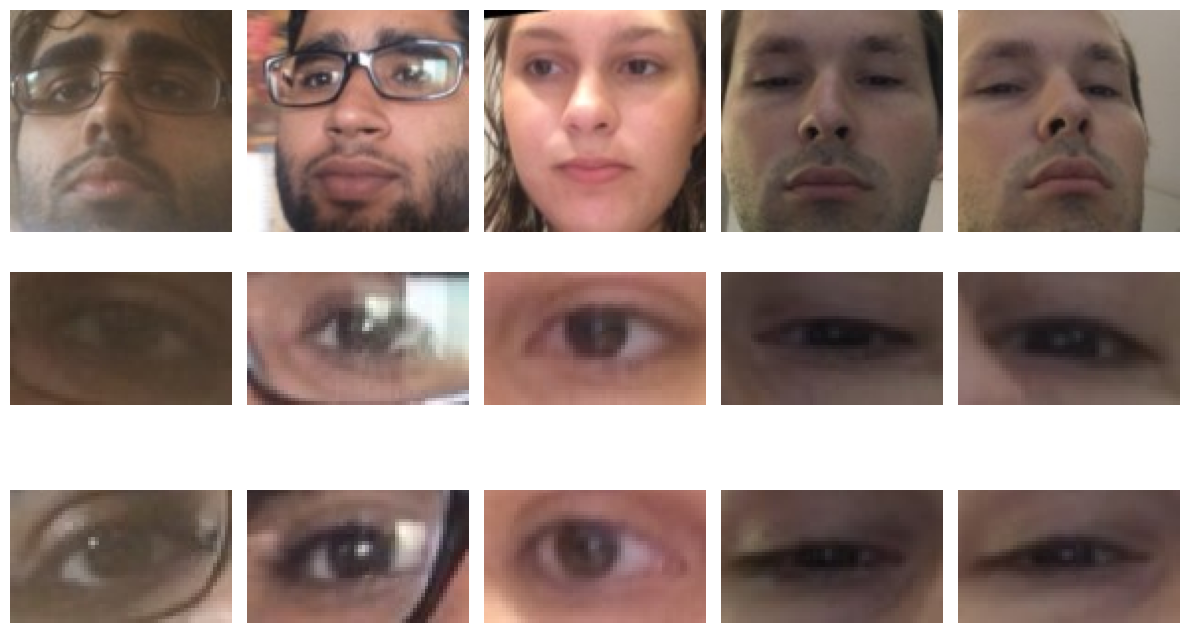

In [ ]:
#look at images for 5 participants

target_subject = sorted(list(subject_ids))[10]
face_imgs, left_imgs, right_imgs = [], [], []



for tp in tar_files:
    tar = tarfile.open(tp, 'r')
    names = [m.name for m in tar.getmembers()]
    matching = sorted([n for n in names if target_subject in n and n.endswith('.face.jpg')])

    if matching:
        for name in matching[:5]:
            base = name.replace('.face.jpg', '')
            face_imgs.append(np.array(Image.open(tar.extractfile(f'{base}.face.jpg'))))
            left_imgs.append(np.array(Image.open(tar.extractfile(f'{base}.left.jpg'))))
            right_imgs.append(np.array(Image.open(tar.extractfile(f'{base}.right.jpg'))))
        tar.close()
        break
    tar.close()

# Display
fig, axes = plt.subplots(3, 5, figsize=(12, 7))

for i in range(5):
    axes[0, i].imshow(face_imgs[i])
    axes[0, i].axis('off')
    if i == 0:
        axes[0, i].set_ylabel('Face', fontsize=12)

    axes[1, i].imshow(left_imgs[i])
    axes[1, i].axis('off')
    if i == 0:
        axes[1, i].set_ylabel('Left Eye', fontsize=12)

    axes[2, i].imshow(right_imgs[i])
    axes[2, i].axis('off')
    if i == 0:
        axes[2, i].set_ylabel('Right Eye', fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
#DELETE-- rewritten above

#Spot Check - Images for 5 other subjects)

NUM_SUBJECTS = 5
FRAMES_PER_SUBJECT = 5

with fs.open(s3_path, "rb") as f:
    h5 = h5py.File(f, "r")

    subjects = list(h5.keys())
    sampled_subjects = random.sample(subjects, NUM_SUBJECTS)

    for subject in sampled_subjects:
        grp = h5[subject]

        total_frames = grp["left_eye"].shape[0]
        frame_ids = random.sample(range(total_frames), FRAMES_PER_SUBJECT)

        for idx in frame_ids:
            fig, axs = plt.subplots(1, 3, figsize=(9, 3))

            axs[0].imshow(grp["left_eye"][idx])
            axs[0].set_title("Left eye")

            axs[1].imshow(grp["right_eye"][idx])
            axs[1].set_title("Right eye")

            axs[2].imshow(grp["face"][idx])
            axs[2].set_title("Face")

            pog = grp["PoG"][idx]
            #plt.suptitle(f"Subject {subject} - frame {idx) | PoG = {pog}")
            plt.suptitle(f"Subject {subject} – frame {idx}| PoG = {pog}")


            plt.axis("off")
            plt.show()


# Frame Counts

In [ ]:
import pandas as pd


total_counts = {'face': 0, 'left': 0, 'right': 0, 'pog': 0}
subject_frame_counts = {}

for tp in tar_files:
    tar = tarfile.open(tp, 'r')
    names = [m.name for m in tar.getmembers()]

    # Count total frames using json files only
    json_files = [n for n in names if n.endswith('.json')]
    total_counts['pog'] += len(json_files)

    # Count per subject frames
    for n in json_files:
        subject = n.split('_')[0]
        subject_frame_counts[subject] = subject_frame_counts.get(subject, 0) + 1

    tar.close()

print(f"Total frames in dataset: {total_counts['pog']}")

df_frames = pd.DataFrame(
    subject_frame_counts.items(),
    columns=["subject_id", "frame_count"]
).sort_values("frame_count")

print(df_frames)

Total frames in dataset: 849131
    subject_id  frame_count
2        00005           18
455      01087           18
94       00295           21
556      01276           26
218      00633           34
..         ...          ...
151      00503         3010
122      00358         3312
391      00980         3472
174      00546         3483
607      01384         3529

[640 rows x 2 columns]


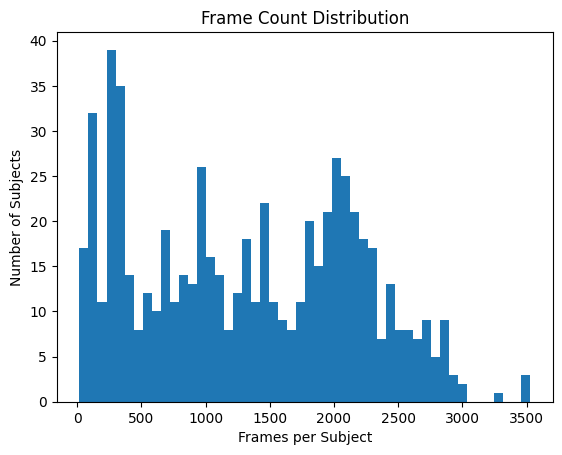

In [ ]:
#Histogram: Frame Distribution  Across Participants
#plot frame count balance across subjects


plt.hist(df_frames["frame_count"], bins=50)
plt.xlabel("Frames per Subject")
plt.ylabel("Number of Subjects")
plt.title("Frame Count Distribution")
plt.show()

# #PoG Quality Audit

In [ ]:
bad_frames = []

for tp in tar_files:
    tar = tarfile.open(tp, 'r')
    json_files = [m for m in tar.getmembers() if m.name.endswith('.json')]

    for jf in json_files:
        data = json.load(tar.extractfile(jf))

        for coord, val in [('pog_x', data['pog_x']), ('pog_y', data['pog_y'])]:
            if np.isnan(val):
                bad_frames.append({
                    'subject_id': data['subject_id'],
                    'frame_idx': data['frame_idx'],
                    'coordinate': coord,
                    'value': val,
                    'reason': 'NaN'
                })
            elif np.isinf(val):
                bad_frames.append({
                    'subject_id': data['subject_id'],
                    'frame_idx': data['frame_idx'],
                    'coordinate': coord,
                    'value': val,
                    'reason': 'Infinite'
                })
    tar.close()

df_bad = pd.DataFrame(bad_frames)

if df_bad.empty:
    print("No bad PoG data found across all 849,131 frames")
else:
    print(f"Found {len(df_bad)} bad coordinates")
    print(df_bad)

No bad PoG data found across all 849,131 frames


#Inspect PoG ranges

In [ ]:
#load the pog labels csv

#the pog_x and pog_y data also exist in the web dataset json files. The csv just made it easier since it was already loaded as a dataframe.

#this is also in the labeling code below. no need to run twice.
#df_labels = pd.read_csv('/content/drive/MyDrive/gaze_labels.csv', dtype={'subject_id': str})

In [ ]:
#PoG coordinate ranges across dataset
print(f"pog_x range: {df_labels['pog_x'].min():.2f} to {df_labels['pog_x'].max():.2f}")
print(f"pog_y range: {df_labels['pog_y'].min():.2f} to {df_labels['pog_y'].max():.2f}")

pog_x range: -20.25 to 20.25
pog_y range: -20.25 to 20.25


In [ ]:
#PoG discrete label boundaries
for label in df_labels['label'].unique():
    subset = df_labels[df_labels['label'] == label]
    print(f"\n{label}:")
    print(f"  pog_x: {subset['pog_x'].min():.2f} to {subset['pog_x'].max():.2f} (mean: {subset['pog_x'].mean():.2f})")
    print(f"  pog_y: {subset['pog_y'].min():.2f} to {subset['pog_y'].max():.2f} (mean: {subset['pog_y'].mean():.2f})")


Down:
  pog_x: -6.89 to 6.88 (mean: 0.56)
  pog_y: -20.25 to -4.00 (mean: -8.03)

Straight:
  pog_x: -4.00 to 4.00 (mean: 0.17)
  pog_y: -4.00 to 4.00 (mean: -0.92)

Left:
  pog_x: -20.25 to -4.00 (mean: -7.99)
  pog_y: -6.88 to 6.89 (mean: -0.56)

Right:
  pog_x: 4.00 to 20.25 (mean: 8.00)
  pog_y: -6.89 to 6.88 (mean: 0.54)

Up:
  pog_x: -6.88 to 6.89 (mean: 0.06)
  pog_y: 4.01 to 20.25 (mean: 11.14)


# Label PoG with classification labels

PoG Category Key:

**Straight:**
both x and y are within 1 unit of center
(abs(x) < 1 and abs(y) < 1)

**Left:**
x is negative abs(x) > abs(y)
(looking left dominates)


**Right:**
x is positive and abs(x) > abs(y)
(looking right dominates)


**Up: **
y is positive and abs(y) > abs(x)
(looking up dominates)


**Down:**
y is negative and abs(y) > abs(x)
(looking down dominates)

So x controls left/right and y controls up/down, and whichever is larger in absolute value wins.

The only exception is Straight which requires both to be very close to zero.

Subject ID: 01170
Frame: 1378
PoG X: -6.04183335523, PoG Y: 1.14442250345
Label: Left


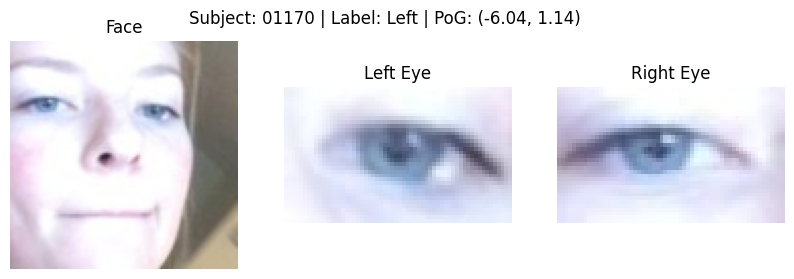

In [ ]:
#Small TEST - Assign PoG label and display it with images, PoG xy coordinates, subject id abnd frame id for a participant

# Pick a random tar file and random frame
tp = random.choice(tar_files)
tar = tarfile.open(tp, 'r')
json_files = [m for m in tar.getmembers() if m.name.endswith('.json')]
jf = random.choice(json_files)

data = json.load(tar.extractfile(jf))
base = jf.name.replace('.json', '')

# Get label
label = label_pog_5([(data['pog_x'], data['pog_y'])])[0]

# Load images
face_img = np.array(Image.open(tar.extractfile(f'{base}.face.jpg')))
left_img = np.array(Image.open(tar.extractfile(f'{base}.left.jpg')))
right_img = np.array(Image.open(tar.extractfile(f'{base}.right.jpg')))
tar.close()

# Display
print(f"Subject ID: {data['subject_id']}")
print(f"Frame: {data['frame_idx']}")
print(f"PoG X: {data['pog_x']}, PoG Y: {data['pog_y']}")
print(f"Label: {label}")

fig, axes = plt.subplots(1, 3, figsize=(10, 3))
axes[0].imshow(face_img)
axes[0].set_title('Face')
axes[0].axis('off')
axes[1].imshow(left_img)
axes[1].set_title('Left Eye')
axes[1].axis('off')
axes[2].imshow(right_img)
axes[2].set_title('Right Eye')
axes[2].axis('off')
plt.suptitle(f"Subject: {data['subject_id']} | Label: {label} | PoG: ({data['pog_x']:.2f}, {data['pog_y']:.2f})")
plt.show()

In [ ]:
#Label all frames

from collections import Counter

label_counts = Counter()
all_labels = []

def label_pog_5(pog, threshold=4):
    labels = []
    for x, y in pog:
        if abs(x) < threshold and abs(y) < threshold:
            labels.append("Straight")
        elif abs(x) > abs(y):
            labels.append("Left" if x < 0 else "Right")
        else:
            labels.append("Down" if y < 0 else "Up")
    return labels

for tp in tar_files:
    tar = tarfile.open(tp, 'r')
    json_files = [m for m in tar.getmembers() if m.name.endswith('.json')]

    for jf in json_files:
        data = json.load(tar.extractfile(jf))
        label = label_pog_5([(data['pog_x'], data['pog_y'])])[0]
        label_counts[label] += 1
        all_labels.append({
            'subject_id': data['subject_id'],
            'frame_idx': data['frame_idx'],
            'pog_x': data['pog_x'],
            'pog_y': data['pog_y'],
            'label': label
        })
    tar.close()

df_labels = pd.DataFrame(all_labels)
df_labels.to_csv('/content/drive/MyDrive/gaze_labels.csv', index=False)
print(f"Saved {len(df_labels)} labeled frames to Drive")

Saved 849131 labeled frames to Drive


Label Distribution:
  Down: 213320 (25.1%)
  Left: 188773 (22.2%)
  Right: 180056 (21.2%)
  Straight: 246664 (29.0%)
  Up: 20318 (2.4%)


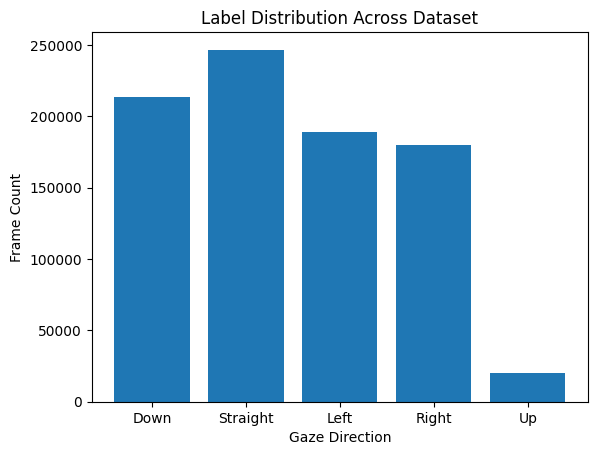

In [ ]:
#Inspect label distribution
total = sum(label_counts.values())
print("Label Distribution:")
for label, count in sorted(label_counts.items()):
    print(f"  {label}: {count} ({count/total*100:.1f}%)")

plt.bar(label_counts.keys(), label_counts.values())
plt.xlabel("Gaze Direction")
plt.ylabel("Frame Count")
plt.title("Label Distribution Across Dataset")
plt.show()

# N O T E S


1. Participant Frame count imbalance will be handled during training

2. The 'IsValid' indicator present in the original GazeCapture dataset is not present in this dataset.  Since the data was preprocessed prior to our use, we assume that invalid frames (where Apple's face and eye detection failed) were excluded during preprocessing, and that all frames in this dataset represent successful detections.

3. PoG category balance: "Up" is severely underrepresented (only 2.39%) which is common in gaze datasets because people don't look up as often during phone use. we will consider class weights to handle the imbalance, especially for the "Up" class to prevent the model from struggling to predict "Up" correctly.

4. PoG discrete labels are saved to a csv because I cannot update the tar files
